<a href="https://colab.research.google.com/github/Floksy10/ADAV1-/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22MLHVL_2%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1 Discuss with your group, write, then describe to your teacher, a list of at least 3 applications where automatic recognition of hand-written numbers would be useful.

For processing checks, so that a human does not have to manually convert hand written digits into digital format.

Processing government forms with a lot of handwritten numbers, like birth dates and ID numbers.

Processing hand-written ledgers; these usually contain a large number of transactions, with details like money figures and dates, that can take a lot of time to read in order to verify or draw conclusions based on them. Having this process automatized would save a lot of time and human effort.

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)

# flattening
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)
print(x_test.shape)

x_train = x_train / 255
x_test = x_test / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(y_train.shape, y_test.shape)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=128,
epochs=12, verbose=1, validation_split=0.2)


In [ ]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

Question 2: Through epochs, the loss curve initially decreases very quickly (from 0.56) with a very high negative rate of change, but this rate of change slowly approaches 0 as epochs increase and the curve flattens plateauing at 0.26. It didn't decrease very much (from 0.56 to 0.26).

Conversely, the accuracy curve behaves like a horizontal reflection of the loss function, increasing up until ~0.93. This makes sense, the behaviour of the accuracy is intimately connected to the behaviour of loss: as one increases, the other decreases.

The accuracy is not very high, (and the loss didn't drop very much) possibly because the model is two small (perhaps not enough hidden layers) or because it is not explicitly told to do any feature extraction as it is a fully connected network and the pixel grid was flattened losing meaningful spatial relationships.

As the training progresses, there is evidence that the model is getting more accurate as the loss is reaching its limit. However, the most meaningful improvements in performance happened during the first 2-4 epochs, with a sharp decrease in the performance's rate of change. Thus, it was obvious that the model would peak around 0.93 accuracy and 0.26 loss, much before the training was finished.

The difference between the real accuracy and the vailidation accuracy is signalig to us how well our model is generalizing to new data. We can immediately see how validation the accuracy and loss scores evolve in a much more chaotic manner than the previously mentioned accuracy and loss ones. It is important to mention however, that the absolute variance between epochs is still rather small (0.01-0.015 in the case of validation accuracy, and 0.02-0.04 in the case of validation loss), even though it appears as larger, relative to that of the latter scores.

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"'loss = {loss}, accuracy")

Question 3:

No, we do not think it is accurate enough. There should not be a room for error at banking and goverment instances. For a banking check, this model would on average make a mistake per 10 digits, which is quite high and could have big consequences (also because these documents tend to have many digits, so the errors accumulate very quickly) the same would apply for government forms and handwritten ledgers. The model might be okay for lower risk, lower amount of digit purposes or if aided with human quality checks, but then it's questionable how much more efficient this would be than just having a human transcribing the digits. Also, the data set contains some very dubious didgits, which even humans might have trouble understanding, it would be useful to compare the model accuracy with human accuracy.

Question 4: The composition of linear functions yiels only another linear function. Because the network mechanism is linear (weighted sums), the activation function is the only way to introduce non-linearity. If you use linear activation functions, no matter how large the network is, it will boil down to a single linear transformation and not be able to represent any non-linear information, which is quite a big limitation. Conversely, using non-linear activation functions, a fully connected network will (theoretically) be able to aproxiamte any function, be it linear or non-linear.

In [ ]:
model_compiled = keras.Sequential()
model_compiled.add(keras.layers.Dense(256, activation="relu", input_shape=(784,)))
model_compiled.add(keras.layers.Dense(10, activation='softmax'))

model_compiled.summary()

model_compiled.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])

history_adjusted = model_compiled.fit(x_train, y_train, batch_size=128,
epochs=12, verbose=1, validation_split=0.2)

In [ ]:
plt.plot(history_adjusted.history['loss'], label = 'loss')
plt.plot(history_adjusted.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(history_adjusted.history['accuracy'], label = 'accuracy')
plt.plot(history_adjusted.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

Question 5

With the ReLu activation function, the loss from the 1st epoch (0.19) is already lower than the 12th epoch of the network with a linear activation (0.26). The

After 12 epochs with the ReLu activation the loss is down to 0.01, much much better than the network with a linear activation (0.26). Similarly, the accuracy goes up to 0.98 with the ReLu network but only 0.92 with the linear one, again quite a large difference.

Both the validation loss and validation accuracy follow the same pattern, performing much better in the ReLu network than the linear one. The validation loss in the 1st epoch in the linear network is quite poor (0.30) compared to the ReLu (0.19), already lower than the linear net after 12 epochs (0.28); after 12 epochs the ReLu validation loss goes down to 0.07 (much better performance than the linear net). Similarly, the validation accuracy is much better in the ReLu net, reaching 0.98 in the 12th epoch, compared to the 0.93 in the linear one. Again, the ReLu net already had better accuracy (0.95) in the 1st epoch than the linear in its 12th.

It's also notable that the behaviour of the validation curves is much more stable in the network with ReLu, beyond just having better absolute values. The difference between the validation curves and the accuracy and loss curves is however higher in ReLu network, even though the absolute loss and accuracy scores are improved. The training and validation curves diverge as training goes on, with the training scores improving faster and faster, compared to the validation ones. This points to an increasing drop-off in generalization, suggesting that we are overfitting out data quite a bit.

Overall, the ReLu network outperforms the linear on every parameter.

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
print(x_test.shape)

x_train = x_train / 255
x_test = x_test / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
model_conv = keras.Sequential()
model_conv.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu", input_shape=(28, 28, 1)))
model_conv.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
activation="relu"))
model_conv.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model_conv.add(keras.layers.Flatten())
model_conv.add(keras.layers.Dense(128, activation="relu"))
model_conv.add(keras.layers.Dense(10, activation="softmax"))

model_conv.compile(loss='categorical_crossentropy',
                   optimizer=keras.optimizers.Adadelta(learning_rate=float(1)),
                   metrics=["accuracy"])

history_conv = model_conv.fit(x_train, y_train, batch_size=128, epochs=6,
                              verbose=1, validation_split=0.2)

In [ ]:
plt.plot(history_conv.history['loss'], label = 'loss')
plt.plot(history_conv.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(history_conv.history['accuracy'], label = 'accuracy')
plt.plot(history_conv.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

Question 6:

The convolutional net performs much better than the previous fully connected net. After epoch 6, the loss from the new model (0.0066) is already lower than the 12th epoch of the previous one (0.0109). Plus, the new model's loss curve is not yet flat, suggesting that the loss will continue on decreasing with further training. Similarly, the accuracy of the convolutional net already performs better at the 6th epoch (0.9981) than the fully connected net at the 12th (0.9977), and again, the loss curve of the new model is still increasing, suggesting that the accuracy will keep on rising.

The validation loss and validation accuracy curves follow the same behaviour, with the convolutional net performing better in both by the 6th epoch (val_loss: 0.0500; val_accuracy: 0.9858) than the fully connected at the 12th (val_loss: 0.0761; val_accuracy: 0.9781). Lastly, the new model also generalizes better on the 6th epoch (accuracy - val_accuracy = 0.0123) than the old one (accuracy - val_accuracy = 0.0196). Though, in both models, generalization seems to be getting worse as training progresses, suggesting a problem with overfitting.

In sum, the convolutional net makes less mistakes and generalizes better than the fully connected one. In the test data, the convolutional net achieved approx. 0.987 accuracy. This value might already be good enough to automatically process checks, government forms and handwritten ledgers (approx. 1 error per 100 digits, but it is still quite a large risk for such important tasks. Companies would need to compare this to human error rate, weighing the efficiency benefits with the liability risks (who is responsible for the error if it was a machine making it?).

In [ ]:
model_drop = keras.Sequential()
model_drop.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu", input_shape=(28, 28, 1)))
model_drop.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
activation="relu"))
model_drop.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model_drop.add(keras.layers.Dropout(rate=0.25))
model_drop.add(keras.layers.Flatten())
model_drop.add(keras.layers.Dense(128, activation="relu"))
model_drop.add(keras.layers.Dropout(rate=0.5))
model_drop.add(keras.layers.Dense(10, activation="softmax"))

model_drop.compile(loss='categorical_crossentropy',
                   optimizer=keras.optimizers.Adadelta(learning_rate=float(1)),
                   metrics=["accuracy"])

history_drop = model_drop.fit(x_train, y_train, batch_size=128, epochs=6,
                              verbose=1, validation_split=0.2)

In [ ]:
loss, accuracy = model_drop.evaluate(x_test, y_test, verbose=0)

print(loss, accuracy)

In [ ]:
plt.plot(history_drop.history['loss'], label = 'loss')
plt.plot(history_drop.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(history_drop.history['accuracy'], label = 'accuracy')
plt.plot(history_drop.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

Question 7:

a) The new model is taking an average of approx. 15.8 ms/step longer than the previous one (probably due to the computational intensity of the added measures to combat overfitting).

b) The accuracy by the 6th epoch is actually worse in the new mode (0.9868) than in the old one (0.9981), which makes sense, as this is measured in the training data and the new model as explicit measures to perform slightly worse on the training data with the benefit of generalizing better. Indeed, the validation accuracy (0.9887) is better in the new model than the old one (0.9858), the same going for the validation loss (old: 0.0500, new: 0.0424). We can see in the graphs that validation accuracy is actually consistently higher than training accuracy for the new model, which contrasts with the previous one where not only was validation accuracy lower than the training accuracy, but it seemed that this difference was increasing further with training. The same goes for loss vs validation loss (but horizontally reflected).

c) Whereas in the previous model the validation curves seemed to be diverging from the training curves, in the new model they seem to be converging (to 0 for loss and 1 for accuracy). This shows us that generalization is much better in the new model.

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)


In [ ]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

x_train = x_train / 255
x_test = x_test / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
def conv2D(x, w, b, size=3, stride=1):
  """
  x:   (N, H_in, W_in, C_in)
  w:   (C_in, C_out, Kh, Kw)
  b:   (C_out)
  """
  N, H_in, W_in, C_in = np.shape(x)
  C_out = w.shape[1]
  H_out = (H_in - size) // stride + 1
  W_out = (W_in - size) // stride + 1
  feature_map = np.zeros((N, C_out, H_out, W_out))

  for n in range(N):  # examples
    for c_out in range(C_out): # number of filters (in the output)
      for h_out in range(H_out):
        for w_out in range(W_out):
          h_start = h_out * stride
          w_start = w_out * stride
          sum_over_channels = 0.0  # (input channels)
          for c_in in range(C_in):
            patch = x[n, h_start:h_start+size, w_start:w_start+size, c_in]
            sum_over_channels += np.sum(w[c_in, c_out,:,:] * patch)
          feature_map[n, c_out, h_out, w_out] = sum_over_channels + b[c_out]

  return feature_map

[[[[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   ...
   [ 0.          0.          1.28235294 ...  0.          0.
     0.        ]
   [ 0.          0.          0.53333333 ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]]

  [[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   ...
   [ 0.          0.         -0.21568627 ...  0.          0.
     0.        ]
   [ 0.          0.         -0.53333333 ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]]]


 [[[ 0.          0.          0.         ...  0.         

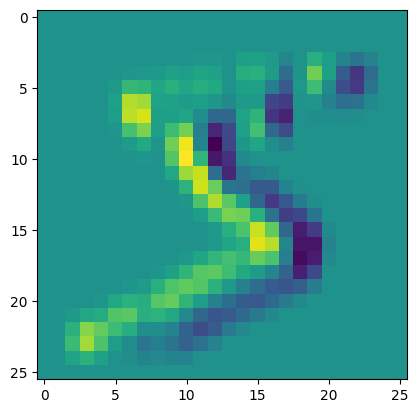

In [ ]:
#Question 8

def conv2D_no_loops(x, w, b, size=3, stride=1):
    """
    x: (N, H_in, W_in, C_in)
    w: (C_in, C_out, Kh, Kw)
    b: (C_out,)

    """
    N, H_in, W_in, C_in = x.shape
    C_in_w, C_out, Kh, Kw = w.shape

    H_out = (H_in - size) // stride + 1
    W_out = (W_in - size) // stride + 1

    # Extract sliding windows: (N, H_out, W_out, size, size, C_in)
    patches = sliding_window_view(x, (size, size, C_in))[..., ::stride, ::stride, :, :, :]
    # Rearrange: (N, H_out, W_out, size, size, C_in)
    patches = patches[:, ::stride, ::stride, :, :, :]

    # Reshape patches → (N, H_out, W_out, C_in, size, size)
    patches = np.moveaxis(patches, -1, -3)

    # Convolution via einsum
    # patches: (N, H_out, W_out, C_in, Kh, Kw)
    # w:       (C_in, C_out, Kh, Kw)
    # result:  (N, H_out, W_out, C_out)
    out = np.einsum('nhwcij,coij->nhwo', patches, w)

    # Add bias
    out += b

    # Reorder to (N, C_out, H_out, W_out) to match your loop version
    return np.moveaxis(out, -1, 1)

feature_map = conv2D(x_train[0:2], w_both, np.zeros(2), 3, 1)
print(feature_map)

plt.imshow(feature_map[0][0])
plt.show()


In [ ]:
def relu(x):
  x = np.maximum(x, 0)
  return x

[[[[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   ...
   [ 0.          0.          1.28235294 ...  0.          0.
     0.        ]
   [ 0.          0.          0.53333333 ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]]

  [[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   ...
   [ 0.          0.         -0.21568627 ...  0.          0.
     0.        ]
   [ 0.          0.         -0.53333333 ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]]]


 [[[ 0.          0.          0.         ...  0.         

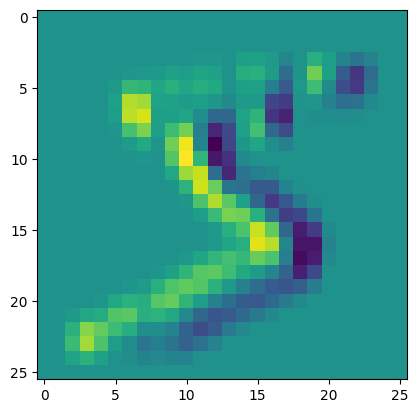

[[[[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   ...
   [0.         0.         1.28235294 ... 0.         0.
    0.        ]
   [0.         0.         0.53333333 ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]

  [[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]]


 [[[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
  

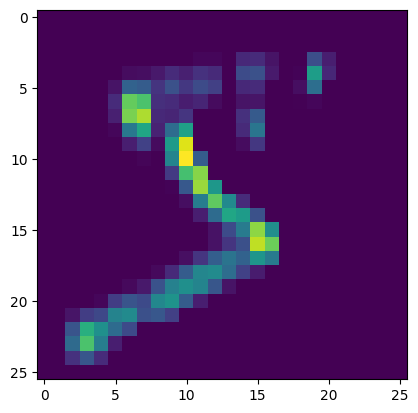

In [ ]:
w_vertical = np.array([[[[-1, 0, 1,
                         -2, 0, 2,
                         -1, 0, 1]]]]).reshape(1, 1, 3, 3)

w_horizontal = np.array([[[[-1, -2, -1,
                            0,   0,  0,
                            1,   2,  1]]]]).reshape(1, 1, 3, 3)

w_both = np.concatenate([w_vertical, w_horizontal], axis=1)

#print(w_both[:,1])

feature_map = conv2D(x_train[0:2], w_both, np.zeros(2), 3, 1)
print(feature_map)

plt.imshow(feature_map[0][0])
plt.show()

print(relu(feature_map))

plt.imshow(relu(feature_map)[0][0])
plt.show()


[[[[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   ...
   [0.         0.         1.28235294 ... 0.         0.
    0.        ]
   [0.         0.         0.53333333 ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]

  [[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]]


 [[[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
  

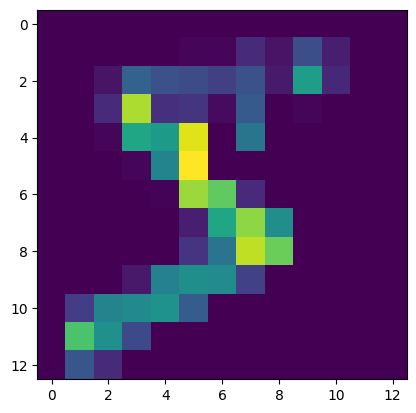

In [ ]:
# Question 10
def max_pooling(x, kernel_size=2):
    N, C, H, W = x.shape
    Kh = Kw = kernel_size

    # Reshape to split each dimension into pooled blocks
    x_reshaped = x.reshape(N, C, H//Kh, Kh, W//Kw, Kw)

    # Take max over the small windows (axis 3 and 5 are the pooling dimensions)
    pooled = x_reshaped.max(axis=3).max(axis=4)
    return pooled

print(feature_map)
max_pooled = max_pooling(feature_map)
print(max_pooled)

plt.imshow(max_pooled[0][0])
plt.show()


In [ ]:
# reshape each dimension into blocks, do this for 4 clones
x_one = np.delete(x, 0, 2) # deletes first row (arr, index, axis)
x_two = np.delete(x_one, 0, 2)  # delestes first two rows
x_three = np.delete(x, 0, 3)  # deletes first column
x_four = np.delete(x_three, 0, 3) # deletes first 2 columns

def pool2d(x, kernel_size=3)
  N, C, H, W = x.shape
  Kh = Kw = kernel_size

  # Reshape to split each dimension into blocks
  x_reshaped = x.reshape(N, C, H//Kh, Kh, W//Kw, Kw)



  x_reshape_one = x.reshape(N, C, H//Kh, W//Kw, Kw)
  x_reshape_two = x.reshape(N, C, H)



In [ ]:
def conv2D2(x, w, b, size=3, stride=1):
    """
    x: (N, H_in, W_in, C_in)
    w: (C_in, C_out, Kh, Kw)
    b: (C_out,)
    returns: (N, C_out, H_out, W_out)
    """
    N, H_in, W_in, C_in = x.shape
    C_in_w, C_out, Kh, Kw = w.shape
    assert C_in == C_in_w, "Input channels must match filter channels"
    assert (Kh, Kw) == (size, size), "Filter size must match 'size' param"

    H_out = (H_in - Kh) // stride + 1
    W_out = (W_in - Kw) // stride + 1

    # Extract sliding windows by fancy indexing
    i0 = np.repeat(np.arange(Kh), Kw)
    i0 = np.tile(i0, C_in)
    i1 = stride * np.repeat(np.arange(H_out), W_out)
    j0 = np.tile(np.arange(Kw), Kh * C_in)
    j1 = stride * np.tile(np.arange(W_out), H_out)
    d = np.repeat(np.arange(C_in), Kh * Kw)

    # Indices of all patches
    # Shape: (Kh*Kw*C_in, H_out*W_out)
    ii = i0.reshape(-1, 1) + i1.reshape(1, -1)
    jj = j0.reshape(-1, 1) + j1.reshape(1, -1)

    # Extract patches into shape (N, H_out*W_out, Kh*Kw*C_in)
    patches = x[:, ii, jj, d.reshape(-1, 1)]
    patches = patches.transpose(0, 2, 1).reshape(N, H_out * W_out, -1)

    # Reshape filters to (C_out, Kh*Kw*C_in)
    w_reshaped = w.transpose(1, 2, 3, 0).reshape(C_out, -1)

    # Matrix multiplication: (N, H_out*W_out, C_out)
    out = patches @ w_reshaped.T + b

    # Reshape to (N, C_out, H_out, W_out)
    return out.transpose(0, 2, 1).reshape(N, C_out, H_out, W_out)

[[[[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   ...
   [ 0.          0.          1.28235294 ...  0.          0.
     0.        ]
   [ 0.          0.          0.53333333 ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]]

  [[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   ...
   [ 0.          0.         -0.21568627 ...  0.          0.
     0.        ]
   [ 0.          0.         -0.53333333 ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]]]


 [[[ 0.          0.          0.         ...  0.         

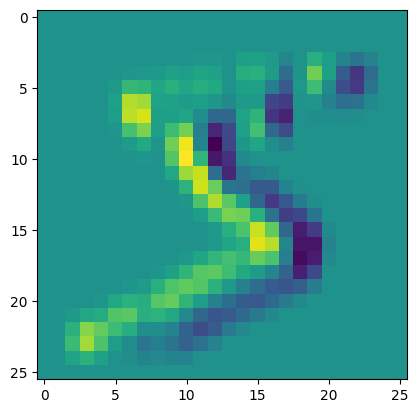

[[[[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   ...
   [0.         0.         1.28235294 ... 0.         0.
    0.        ]
   [0.         0.         0.53333333 ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]

  [[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]]


 [[[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
  

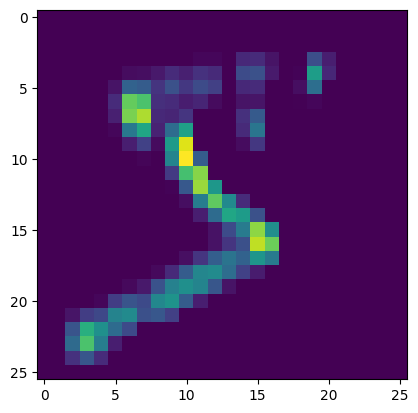

In [ ]:
w_vertical = np.array([[[[-1, 0, 1,
                         -2, 0, 2,
                         -1, 0, 1]]]]).reshape(1, 1, 3, 3)

w_horizontal = np.array([[[[-1, -2, -1,
                            0,   0,  0,
                            1,   2,  1]]]]).reshape(1, 1, 3, 3)

w_both = np.concatenate([w_vertical, w_horizontal], axis=1)

#print(w_both[:,1])

feature_map = conv2D2(x_train[0:2], w_both, np.zeros(2), 3, 1)
print(feature_map)

plt.imshow(feature_map[0][0])
plt.show()

print(relu(feature_map))

plt.imshow(relu(feature_map)[0][0])
plt.show()


In [ ]:
def normalize(x):
  x = x - np.mean(x)
  x = x / np.std(x)
  return x
print(max_pooled)
print(normalize(max_pooled))

[[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
    0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
    0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
    0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
    0.00000000e+00 7.05882353e-02 5.88235294e-02 4.62745098e-01
    1.92156863e-01 8.98039216e-01 3.17647059e-01 0.00000000e+00
    0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 1.92156863e-01 1.16862745e+00
    9.25490196e-01 8.47058824e-01 7.09803922e-01 9.25490196e-01
    2.74509804e-01 2.07058824e+00 4.07843137e-01 0.00000000e+00
    0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 4.54901961e-01 3.25490196e+00
    5.01960784e-01 5.72549020e-01 1.09803922e-01 1.05882353e+00
    0.00000000e+00 7.05882353e-02 0.00000000e+00 0.00000000e+00
    0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 7.05882353e-02 2.20000000e+00
    2.02352941e+00 3.54117647e+00 0.00000000e+00 1.43921569e+00
    0.00000000e+00 0.000

In [ ]:
#Question 12
def connected_layer(x, w, b=None):

  x = x.reshape(x.shape[0], -1)
  N, in_features = x.shape

  W = np.array(w)

  # compute outputs: (N, out_features)
  out = np.dot(x, W.T)

  # add bias if given
  if b is not None:
      out += b

  return out


(2, 10)


In [ ]:
# Question 13

def softmax(x):
  exp_x = np.exp(x)

  probs = exp_x / np.sum(exp_x)

  return probs